# Пет-проект "Исследование объявлений о продаже квартир"

### В вашем распоряжении данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача - установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
### По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

## Шаг 1. Загрузка данных

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t') # sep='\t', без него все в 1 столбец выведет 

# Проверка загрузки данных
print("=== ПРОВЕРКА ЗАГРУЗКИ ДАННЫХ ===")
print(f"Размер данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\nПервые 10 строк данных:")
display(df.head(10))

print("\nИнформация о данных:")
df.info()

print("\nНазвания столбцов:")
print(df.columns.tolist())

print("\nПроверка наличия данных:")
print(f"В датасете: {df.size} элементов")
print(f"Есть ли пустой датасет: {df.empty}")
print(f"Тип объекта: {type(df)}")

print("\nОсновные статистики по числовым столбцам:")
display(df.describe())

=== ПРОВЕРКА ЗАГРУЗКИ ДАННЫХ ===
Размер данных: 23699 строк, 22 столбцов

Первые 10 строк данных:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 1

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


## Шаг 2: Предобработка данных

### Анализ пропущенных значений

In [3]:
# Анализ пропущенных значений
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Пропущенные значения:")
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': missing_percent
})

missing_info = missing_info[missing_info['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)
missing_info

Пропущенные значения:


,Количество пропусков,Процент пропусков
is_apartment,20924,88.290645
parks_nearest,15620,65.909954
ponds_nearest,14589,61.559559
balcony,11519,48.605426
ceiling_height,9195,38.799105
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
parks_around3000,5518,23.283683
ponds_around3000,5518,23.283683
days_exposition,3181,13.422507


### Заполнение пропусков

In [4]:
# Создать копию данных для обработки
df_clean = df.copy()

In [5]:
# is_apartment
# Апартаменты - это особый статус, который обычно указывается явно. Если значение не указано, скорее всего это обычная квартира
# Стратегия заполнения: заполнить значением False
df_clean['is_apartment'] = df_clean['is_apartment'].fillna(False)
print(f"is_apartment заполнены False. Количество оставшихся пропусков: {df_clean['is_apartment'].isnull().sum()}")

is_apartment заполнены False. Количество оставшихся пропусков: 0


In [6]:
# parks_nearest, ponds_nearest
# Возможные причины отсутствия данных: объективное отсутствие парков и водоемов, 
# технические проблемы (ошибки при получении данных), особенности локаций (новостройки без развитой инфоаструктуры).
# Стратегия заполения: 
# Если parks_nearest3000, ponds_nearest3000 = 0 - заполнить большим числом (например 10000)
# Если parks_nearest3000, ponds_nearest3000 > 0 - заполнить медианой по локации
# Если нет данных по локации - заполнить по общей медиане

# Общие медианы
general_medians = {
    'parks_nearest': df_clean['parks_nearest'].median(),
    'ponds_nearest': df_clean['ponds_nearest'].median()
}

print(f"Общая медиана расстояния до парков: {general_medians['parks_nearest']:.0f} м")
print(f"Общая медиана расстояния до водоемов: {general_medians['ponds_nearest']:.0f} м")

Общая медиана расстояния до парков: 455 м
Общая медиана расстояния до водоемов: 502 м


In [7]:
# Заполнить parks_nearest и ponds_nearest
for col in ['parks_nearest', 'ponds_nearest']:
    around_col = 'parks_around3000' if col == 'parks_nearest' else 'ponds_around3000'

    for idx, row in df_clean[df_clean[col].isnull()].iterrows():
        if row[around_col] == 0:
            # Если нет объектов в радиусе 3 км, установить большое расстояние
            df_clean.at[idx, col] = 10000
        else:
            # Поиск медианы по локации
            locality = row['locality_name']
            loc_median = df_clean[
                (df_clean['locality_name'] == locality) &
                (df_clean[col].notnull())
            ][col].median()

            if pd.notna(loc_median):
                df_clean.at[idx, col] = loc_median
            else:
                df_clean.at[idx, col] = general_medians[col] # Общая медиана

print(f"parks_nearest и ponds_nearest заполнены.")
print(f"Количество оставшихся пропусков:")
print(f"parks_nearest: {df_clean['parks_nearest'].isnull().sum()}")
print(f"ponds_nearest: {df_clean['ponds_nearest'].isnull().sum()}") 

parks_nearest и ponds_nearest заполнены.
Количество оставшихся пропусков:
parks_nearest: 0
ponds_nearest: 0


In [8]:
# airports_nearest и cityCenters_nearest 
# Возможные причины отсутствия данных: объективное отсутствие аэропортов, 
# технические проблемы (ошибки при получении данных)
# Стратегия заполнения: Заполнить медианой по локации (locality_name), если локация неизвестна, то по общей медиане
for col in ['airports_nearest', 'cityCenters_nearest']:
    # Создать временный столбец с медианой по локации
    locality_median = df_clean.groupby('locality_name')[col].transform('median')

    # Заполнить пропуски: сначала медианой по локации
    df_clean[col] = df_clean[col].fillna(locality_median)

    # Если остались пропуски, заполнить общей медианой
    general_median = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(general_median)

    missing_after = df_clean[col].isnull().sum()
    print(f"Количество оставшихся пропусков {col}: {missing_after}")

Количество оставшихся пропусков airports_nearest: 0
Количество оставшихся пропусков cityCenters_nearest: 0


In [9]:
# balcony, parks_around3000, ponds_around3000
# Возможные причины отсутствия данных: пропуски = отсутствие объекта
# Стратегия заполнения: заполнить нулями данные пропуски (balcony = 0 - отсутствие балкона, parks_around3000 = 0 и ponds_around3000 - 
# отсутствие парков и водоемов в радиусе 3 км)
zero_fill_columns = ['balcony', 'parks_around3000', 'ponds_around3000']
for col in zero_fill_columns:
    df_clean[col] = df_clean[col].fillna(0)
    print(f"Количество оставшихся пропусков {col}: {df_clean[col].isnull().sum()} пропусков")

Количество оставшихся пропусков balcony: 0 пропусков
Количество оставшихся пропусков parks_around3000: 0 пропусков
Количество оставшихся пропусков ponds_around3000: 0 пропусков


In [10]:
# ceiling_height 
# Возможные причины отсутствия данных: высота потолков не везде измерена.
# Стратегия заполнения: посмотреть распределение данных по высоте потолков, посмотреть связь высоты потолков и этажности
ceiling_stats = df['ceiling_height'].describe()
print(f"Медиана: {ceiling_stats['50%']:.2f} м")
print(f"Среднее: {ceiling_stats['mean']:.2f} м")
print(f"Стандартное: {ceiling_stats['std']:.2f} м")
print(f"Минимум: {ceiling_stats['min']:.2f} м")
print(f"Максимум: {ceiling_stats['max']:.2f} м")

Медиана: 2.65 м
Среднее: 2.77 м
Стандартное: 1.26 м
Минимум: 1.00 м
Максимум: 100.00 м


In [11]:
# Самые частые значения высоты потолков
common_heights = df['ceiling_height'].value_counts().head()
for height, count in common_heights.items():
    print(f" * {height} м: {count} объявлений")

 * 2.5 м: 3515 объявлений
 * 2.6 м: 1646 объявлений
 * 2.7 м: 1574 объявлений
 * 3.0 м: 1112 объявлений
 * 2.8 м: 993 объявлений


In [12]:
# Зависимость от этажности
height_by_floors = df.groupby('floors_total')['ceiling_height'].median().sort_values()

# Группировка по типам домов
floor_categories = {
    "Малоэтажные: (1, 5)": (1, 5), 
    "Панельные: (5, 12)": (5, 12),
    "Высотные: (12, 100)": (12, 100)
}

for category, (min_floor, max_floor) in floor_categories.items():
    mask = (df['floors_total'] >= min_floor) & (df['floors_total'] <= max_floor)
    median_height = df[mask]['ceiling_height'].median()
    print(f"{category}: {median_height:.2f}")

Малоэтажные: (1, 5): 2.60
Панельные: (5, 12): 2.60
Высотные: (12, 100): 2.70


In [13]:
# Оптимальная высота заполнения
overall_median = df['ceiling_height'].median()
print(f"Общая медиана по данным: {overall_median:.2f} м")

common_floors = df['floors_total'].mode()
common_heights = df[df['floors_total'].isin(common_floors)]['ceiling_height'].median()
print(f"Медиана в типичных домах: {common_heights:.2f} м")

standart_values = [2.5, 2.6, 2.7, 2.8, 3.0]
closest_standart = min(standart_values, key=lambda x: abs(x - overall_median))
print(f"Ближайший стандарт: {closest_standart} м")

Общая медиана по данным: 2.65 м
Медиана в типичных домах: 2.55 м
Ближайший стандарт: 2.6 м


In [14]:
# Медиана по высоте потолков = 2.65 м
# Заполнить медианой по типу дома (floors_total)
# Если нет данных по типу дома - установить 2.65 м
# Вычислить медиану высоты потолков по этажности
ceiling_by_floors = df_clean.groupby('floors_total')['ceiling_height'].median()
general_ceiling_median = df_clean['ceiling_height'].median()

def fill_ceiling(row):
    if pd.isna(row['ceiling_height']):
        if pd.notna(row['floors_total']) and row['floors_total'] in ceiling_by_floors:
            return ceiling_by_floors[row['floors_total']]
        else:
            return general_ceiling_median
    return row['ceiling_height']

df_clean['ceiling_height'] = df_clean.apply(fill_ceiling, axis=1)
print(f"Количество оставшихся пропусков ceiling_height: {df_clean['ceiling_height'].isnull().sum()}")

Количество оставшихся пропусков ceiling_height: 1


##### Остался 1 пропуск почему-то... Он статически не значим, так как не повлияет на средние, медианы и корреляции. Оставить как есть

In [15]:
# days_exposition (Сколько дней было размещено объявление, от публикации до снятия)
# Возможные причины отсутствия данных: квартира еще продается (активная сделка)
# Стратегия заполнения: заполнить медианой НЕЛЬЗЯ, исказит данные; заполнить 0 НЕЛЬЗЯ, получение выбросов
# Оставить данные как есть. Пропуск - сигнал что квартира продается
# В выводах указать эту особенность
print(f"Количество оставшихся пропусков days_exposition: {df_clean['days_exposition'].isnull().sum()}")

Количество оставшихся пропусков days_exposition: 3181


In [16]:
# kitchen_area и living_area
# Возможные причины отсутствия данных: не внесены, технический сбой
# Стратегия заполнения: Основываясь на документах по строительным нормам и жилым стандартам, существуют
# рекомендуемые соотношения для помещений: кухня 10-15%, жилая зона 60-70%, вспомагательные помещения 15-30%
# Вычислить из total_area представленные %
def fill_areas(row):
    # Если есть total_area, но нет kitchen_area/living_area
    if pd.notna(row['total_area']):
        # kitchen_area (10-15% от total_area, взять 12% - среднее)
        if pd.isna(row['kitchen_area']):
            row['kitchen_area'] = row['total_area'] * 0.12
        
        # living_area (остаток после kitchen_area)
        if pd.isna(row['living_area']):
            row['living_area'] = row['total_area'] - row['kitchen_area']
    
    return row

df_clean = df_clean.apply(fill_areas, axis=1)
print(f"Количество оставшихся пропусков kitchen_area: {df_clean['kitchen_area'].isnull().sum()}")
print(f"Количество оставшихся пропусков living_area: {df_clean['living_area'].isnull().sum()}")

Количество оставшихся пропусков kitchen_area: 0
Количество оставшихся пропусков living_area: 0


In [17]:
# floors_total
# Процент пропусков очень низкий 0.36%
# Стратегия заполнения: оставить как есть, данные пропуски статистически незначимы, не влияют на качество выводов
print(f"Количество оставшихся пропусков floors_total: {df_clean['floors_total'].isnull().sum()}")

Количество оставшихся пропусков floors_total: 86


In [18]:
# locality_name
# Процент пропусков очень низкий 0.2%, но данный пропуск критический
# Географический анализ невозможен без локации, невозможно сравнивать цены между районами, теряется ключевой фактор ценообразования
# Стратегия заполнения: заполнить неизвестными данными НЕЛЬЗЯ, попытаться определить по геоданным - сложно и малый % пропусков
# Необходимо исключить данные из анализа, это упростит последующий анализ
df_clean = df_clean.dropna(subset=['locality_name']).copy()

# После исключения
print(f"Всего записей: {len(df_clean):}")
print(f"Удалено записей: {len(df) - len(df_clean)}")
print(f"Сохранено данных: {len(df_clean)/len(df)*100:.1f}%")
print(f"Количество оставшихся пропусков locality_name: {df_clean['locality_name'].isnull().sum()}")

Всего записей: 23650
Удалено записей: 49
Сохранено данных: 99.8%
Количество оставшихся пропусков locality_name: 0


In [19]:
# Пропущенные значения
missing_data_clean = df_clean.isnull().sum()
missing_percent_clean = (missing_data_clean / len(df_clean)) * 100

print("Пропущенные значения:")
missing_info_clean = pd.DataFrame({
    'Количество пропусков': missing_data_clean,
    'Процент пропусков': missing_percent_clean
})

missing_info_clean = missing_info_clean[missing_info_clean['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)
missing_info_clean

Пропущенные значения:


,Количество пропусков,Процент пропусков
days_exposition,3180,13.446089
floors_total,85,0.359408
ceiling_height,1,0.004228


##### После заполнения пропущенных значений остался небольшой % пропусков. Пропуски days_exposition означают, что объявление о продаже квартиры - активное. Оставшиеся пропуски меньше, чем стандартная статистическая погрешность. Данные пропуски не повлияют на достоверность выводов. locality_name в количестве 0.2% исключены из анализа, это позволит упростить дальнейший анализ. 

### Приведение данных к правильным типам

In [20]:
# Проверка типов данных в df_clean
print(df_clean.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [21]:
# Преобразовать object столбцы
df_clean['first_day_exposition'] = pd.to_datetime(df_clean['first_day_exposition'], errors='coerce')
df_clean['locality_name'] = df_clean['locality_name'].astype('category')

print(f"first_day_exposition: {df_clean['first_day_exposition'].dtype}")
print(f"locality_name: {df_clean['locality_name'].dtype}")

first_day_exposition: datetime64[ns]
locality_name: category


#### После преобразование данных можно:
1. Считать среднее, медиану, стандартное отклонение
2. Строить гистограммы и графики
3. Вычислять корреляции
4. Сортировать и фильтровать по значениям

## Шаг 3. Добавление новых столбцов

#### Необходимо добавить новые критически важные столбцы:
1. Цена за квадратный метр (price_per_sqm)
2. Дата публикации (day/month/year)
3. Этаж квартиры (floor_type)
4. Соотношения площадей (living_to_total_ratio, kitchen_to_total_ratio)
5. Расстояние до центра в км (city_center_km)

In [22]:
# Цена за квадратный метр
df_clean['price_per_sqm'] = df_clean['last_price'] / df_clean['total_area']

In [23]:
# Дата публикации
df_clean['publication_day'] = df_clean['first_day_exposition'].dt.day_name()
df_clean['publication_month'] = df_clean['first_day_exposition'].dt.month
df_clean['publication_year'] = df_clean['first_day_exposition'].dt.year

In [24]:
# Этаж квартиры
def get_floor_type(row):
    if pd.isna(row['floor']) or pd.isna(row['floors_total']):
        return 'unknown'
    elif row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

df_clean['floor_type'] = df_clean.apply(get_floor_type, axis=1)

In [25]:
# Соотношения площадей
df_clean['living_to_total_ratio'] = df_clean['living_area'] / df_clean['total_area']
df_clean['kitchen_to_total_ratio'] = df_clean['kitchen_area'] / df_clean['total_area']

In [26]:
# Расстояние до центра в км
df_clean['city_center_km'] = (df_clean['cityCenters_nearest'] / 1000).round().astype('Int64')

In [27]:
print("Добавлены новые столбцы:")
new_columns = ['price_per_sqm', 'publication_day', 'publication_month', 'publication_year', 
               'floor_type', 'living_to_total_ratio', 'kitchen_to_total_ratio', 'city_center_km']
df_clean[new_columns].head()

Добавлены новые столбцы:


,price_per_sqm,publication_day,publication_month,publication_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio,city_center_km
0,120370.370370,Thursday,3,2019,other,0.472222,0.231481,16
1,82920.792079,Tuesday,12,2018,first,0.460396,0.272277,19
2,92785.714286,Thursday,8,2015,other,0.612500,0.148214,14
3,408176.100629,Friday,7,2015,other,0.880000,0.120000,7
4,100000.000000,Tuesday,6,2018,other,0.320000,0.410000,8


#### Теперь можно начать исследовать данные
##### Цена за квадратный метр:
1. Сравнение рынка: можно сравнивать квартиры разной площади 
2. Выявление аномалий: резко низкая/высокая цена за м² = подозрительно
3. Географический анализ: где самые дорогие/дешевые районы

##### Дата публикации:
1. Сезонность: В какие месяцы больше/меньше продаж
2. Дни недели: В какие дни публикуют больше объявлений
3. Годовые тенденции: Рост/падение рынка по годам
4. Время продажи: Сколько дней продается в разные сезоны

##### Этаж квартиры:
1. Первый этаж: Обычно дешевле (шум, безопасность)
2. Последний этаж: Может быть дешевле (протечки, жара) 
3. Другие этажи: Наиболее востребованы
4. Анализ премиума: Насколько цена зависит от этажа

##### Соотношения площадей:
1. living_to_total_ratio: Доля жилой площади (комфорт)
2. kitchen_to_total_ratio: Доля кухни (важно для готовки) 
3. Выявление: Нестандартные планировки (кухня 50% = студия?)
4. Влияние на цену: Какие соотношения больше ценятся

##### Расстояние до центра в км:
1. Пространственный анализ: Как цена зависит от удаленности
2. Определение центра: Где заканчивается 'центральная зона'
3. Кластеризация: Группировка по удаленности от центра
4. Транспортная доступность: Анализ ценовой доступности

In [29]:
print("\nПервые 10 строк данных обновленных данных:")
display(df_clean.head(10))


Первые 10 строк данных обновленных данных:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,publication_day,publication_month,publication_year,floor_type,living_to_total_ratio,kitchen_to_total_ratio,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,Thursday,3,2019,other,0.472222,0.231481,16
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,10000.0,0.0,10000.0,81.0,82920.792079,Tuesday,12,2018,first,0.460396,0.272277,19
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,Thursday,8,2015,other,0.612500,0.148214,14
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,139.92,9,False,False,False,19.08,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,Friday,7,2015,other,0.880000,0.120000,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,Tuesday,6,2018,other,0.320000,0.410000,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,26757.5,13101.0,0.0,455.0,0.0,502.0,55.0,95065.789474,Monday,9,2018,other,0.473684,0.299342,13
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,10000.0,0.0,10000.0,155.0,99195.710456,Thursday,11,2017,other,0.284182,0.386059,19
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,52.70,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,10000.0,0.0,10000.0,NaN,110544.692737,Thursday,4,2019,other,0.736034,0.263966,12
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,26757.5,13101.0,0.0,455.0,0.0,502.0,189.0,87454.764777,Wednesday,5,2018,other,0.465320,0.265682,13
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,10000.0,0.0,10000.0,289.0,88524.590164,Sunday,2,2017,other,0.714754,0.106557,15


##### Новые столбцы преобразуют сырые данные в осмысленные метрики для анализа.
##### Теперь необходимо проанализировать данные и получить рыночные закономерности.

## Шаг 4. Исследовательский анализ данных

### Анализ основных параметров 

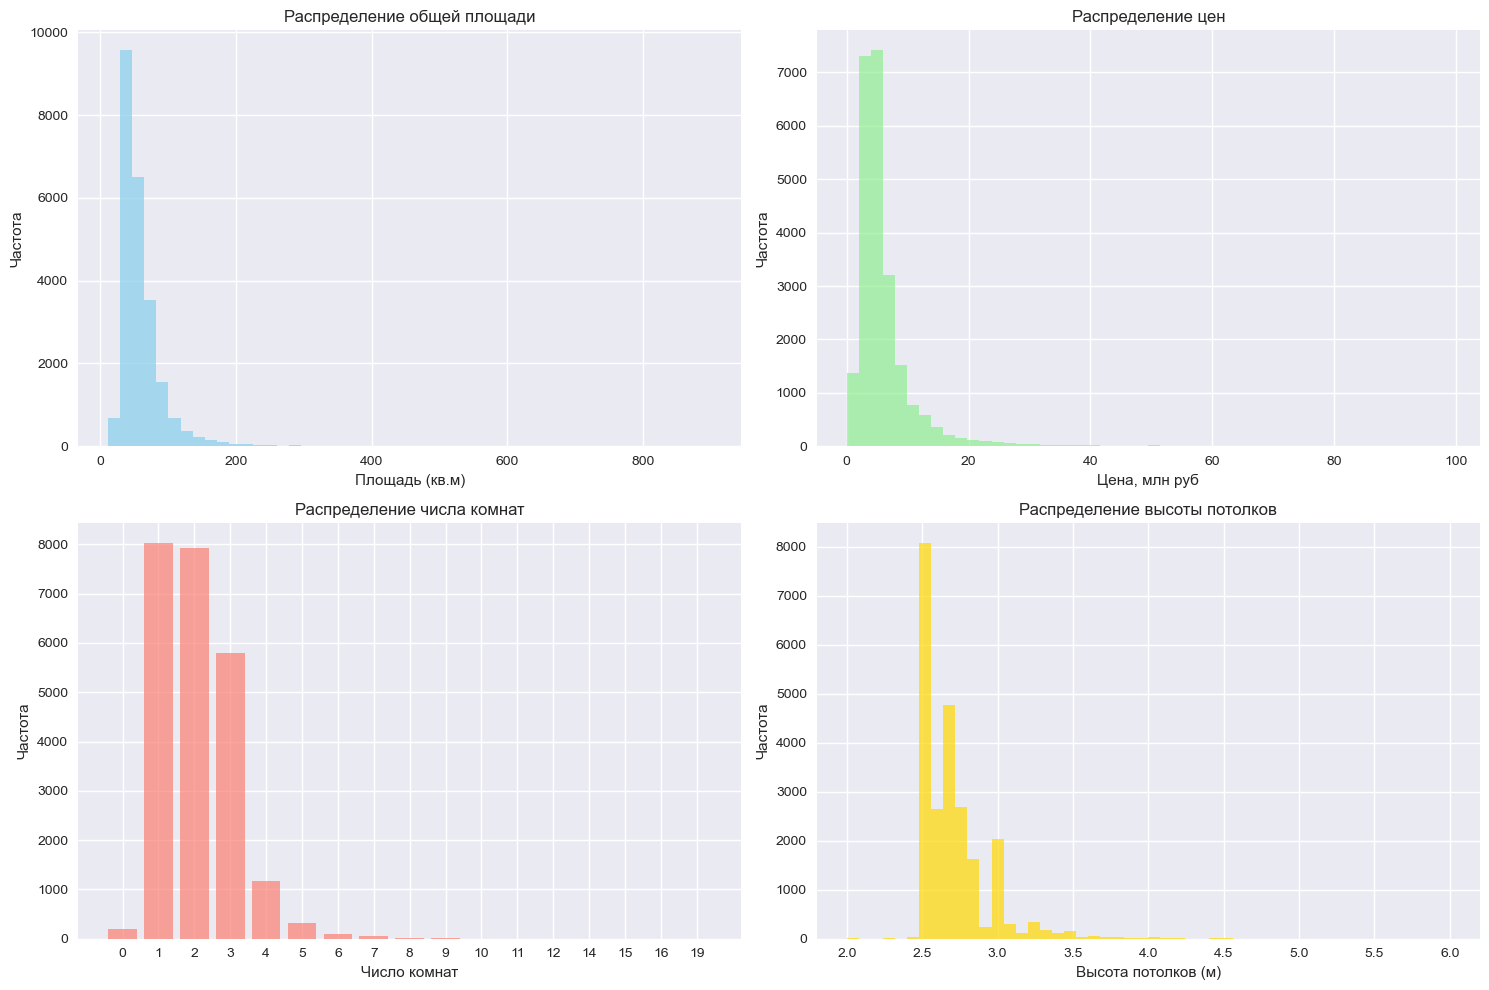

In [30]:
# Основные параметры: площадь, цена, комнаты, высота потолков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Площадь (базовый показатель)
# Основной фактор цены (прямо влияет на стоимость), Потребности покупателей (разные площади для разных целей), Сегментация рынка (студии, 1-комнатные и тд)
axes[0,0].hist(df_clean['total_area'].dropna(), bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Распределение общей площади')
axes[0,0].set_xlabel('Площадь (кв.м)')
axes[0,0].set_ylabel('Частота')

# Цена (целевой показатель)
# Доступность жилья (анализ для разных бюджетов), Рыночная динамика (рост/падение цен), Валидация данных (выявление нереалистичных цен)
# Преобразовать цены в миллионы рублей
price_in_millions = df_clean['last_price'].dropna() / 1000000
# Ограничить диапазоном (например, до 100 млн)
price_filtered = price_in_millions[price_in_millions <= 100]
axes[0,1].hist(price_filtered, bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Распределение цен')
axes[0,1].set_xlabel('Цена, млн руб')
axes[0,1].set_ylabel('Частота')

# Число комнат (решение по планировке)
# Целевая аудитория (Студенты, семьи, инвестиции), Влияние на цену (премиум за дополнительные комнаты)
room_counts = df_clean['rooms'].value_counts().sort_index()
axes[1,0].bar(room_counts.index.astype(str), room_counts.values, alpha=0.7, color='salmon')
axes[1,0].set_title('Распределение числа комнат')
axes[1,0].set_xlabel('Число комнат')
axes[1,0].set_ylabel('Частота')

# Высота потолков (влияние на восприятие площади)
# Эпоха строительства (cталинки, хрущевки, новостройки), премиум-фактор (чем выше - тем дороже)
ceiling_data = df_clean['ceiling_height'].dropna()
ceiling_data = ceiling_data[(ceiling_data >= 2) & (ceiling_data <= 6)]  # фильтруем от 2 до 6 метров
axes[1,1].hist(ceiling_data, bins=50, alpha=0.7, color='gold')
axes[1,1].set_title('Распределение высоты потолков')
axes[1,1].set_xlabel('Высота потолков (м)')
axes[1,1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

##### График 1. Распределение общей площади
1. Форма: Скошенное вправо распределение
2. Пик: Наибольшее количество предложений сосредоточено в диапазоне примерно 20-60 м²
3. Вывод: Рынок ориентирован на квартиры малой и средней площади - студии, 1-2 комнатные квартиры

##### График 2. Распределение цен (до 100 млн руб)
1. Сильная асимметрия: Подавляющее большинство предложений до 20 млн рублей
2. Пик: Основной объем рынка в диапазоне примерно 2-10 млн рублей
3. Длинный хвост: Наличие небольшого количества премиальных объектов
4. Вывод: Рынок массовый, с преобладанием бюджетного и среднего сегмента

##### График 3. Распределение числа комнат
1. Лидеры: Наибольшее количество предложений - 1- и 2-комнатные квартиры
2. Снижение: Чем больше комнат, тем меньше предложений
3. Вывод: Спрос и предложение сконцентрированы на компактном жилье

##### График 4. Распределение высоты потолков (2-6 м)
1. Основной диапазон: 2.5-3.0 метра - стандарт для большинства квартир
2. Пик: около 2.7-2.8 м (типично для современных новостроек)
3. Премиум сегмент: Высоты выше 3.5 метров встречаются редко

#### Профиль типичного предложения:
1. 1-2 комнатная квартира
2. Площадью 30-50 м²
3. Стоимостью 5-8 млн рублей
4. Высотой потолков 2.7-2.8 м

### Анализ времени продажи

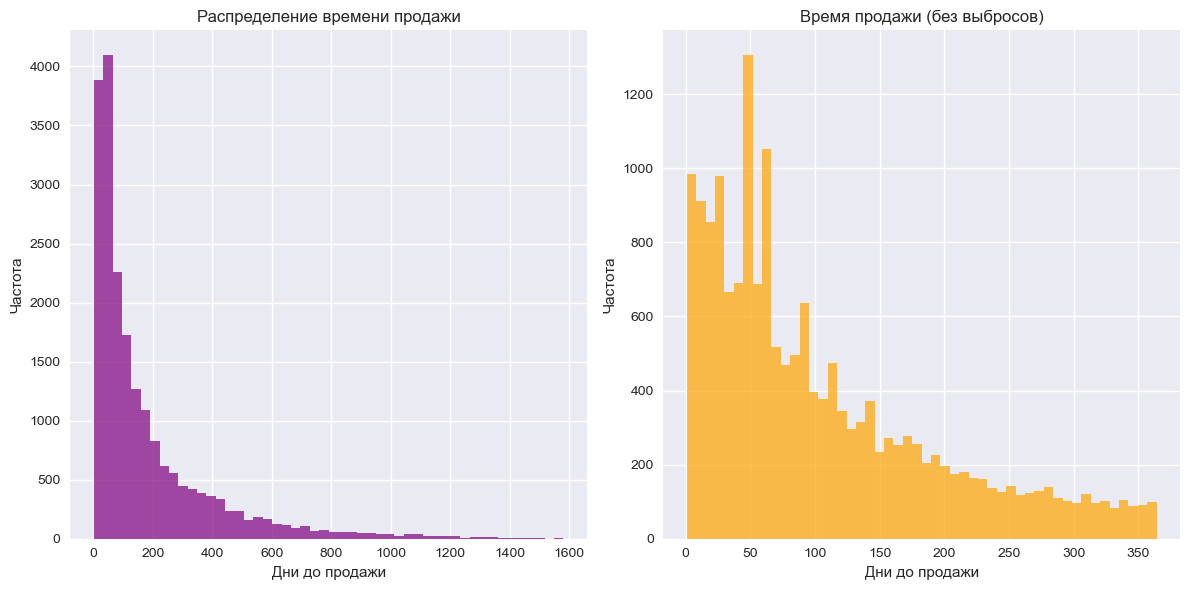

Среднее время продажи: 180.8 дней
Медианное время продажи: 95.0 дней
Минимальное время продажи: 1.0 дней
Максимальное время продажи: 1580.0 дней

25-й перцентиль: 45.0 дней - продажи быстрее этого считаются быстрыми
75-й перцентиль: 231.0 дней - продажи дольше этого считаются долгими


In [31]:
# Понять рыночную динамику (как быстро продаются квартиры и какие факторы влияют на скорость продажи)
# Время продажи квартир
# Первый график, полные данные (реальная картина со всеми данными)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_clean['days_exposition'].dropna(), bins=50, alpha=0.7, color='purple')
plt.title('Распределение времени продажи')
plt.xlabel('Дни до продажи')
plt.ylabel('Частота')

# Второй график (без выбросов, <= 365 дней)
plt.subplot(1, 2, 2)
# Исключить выбросы для лучшей визуализации
days_no_outliers = df_clean[df_clean['days_exposition'] <= 365]['days_exposition']
plt.hist(days_no_outliers.dropna(), bins=50, alpha=0.7, color='orange')
plt.title('Время продажи (без выбросов)')
plt.xlabel('Дни до продажи')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Статистика времени продажи
mean_days = df_clean['days_exposition'].mean()
median_days = df_clean['days_exposition'].median()

print(f"Среднее время продажи: {mean_days:.1f} дней")
print(f"Медианное время продажи: {median_days:.1f} дней")
print(f"Минимальное время продажи: {df_clean['days_exposition'].min():.1f} дней")
print(f"Максимальное время продажи: {df_clean['days_exposition'].max():.1f} дней")

# Квантили для определения быстрых и долгих продаж
q25 = df_clean['days_exposition'].quantile(0.25)
q75 = df_clean['days_exposition'].quantile(0.75)

print(f"\n25-й перцентиль: {q25:.1f} дней - продажи быстрее этого считаются быстрыми")
print(f"75-й перцентиль: {q75:.1f} дней - продажи дольше этого считаются долгими")

##### Первый график (полные данные):
1. Сильная правосторонняя асимметрия - большинство продаж происходит быстро
2. Длинный хвост - есть значительное количество объявлений, которые висят очень долго (более 500-1000 дней)
3. Пик в начале - максимальная концентрация в зоне 0-100 дней

##### Второй график (без выбросов, до 365 дней):
1. Четкий пик в первые 50 дней - это основной период, когда продается большинство квартир
2. Быстрое убывание - после 100 дней количество продаж резко снижается
3. Мода ≈ 20-30 дней - наиболее вероятное время продажи

##### Ключевые инсайты:
1. Рыночная ликвидность (большинство квартир продаются быстро):
    - 25% квартир продаются за 45 дней или быстрее - "горячие" предложения
    - Медиана 95 дней - типичное время экспозиции
    - 75% продаются за 180 дней или быстрее
2. Два сегмента рынка:
    - "Горячие" предложения (до 45 дней) - хорошие продажи, ликвидные объекты
    - "Обычные" продажи (45-180 дней) - стандартный рынок
    - "Долгоиграющие" (более 180 дней) - вероятно, переоцененные или проблемные объекты
3. Практические выводы:
    - Оптимальный период для оценки эффективности цены - 2-3 месяца
    - Тревожный сигнал - если квартира не продается 6+ месяцев
    - Рыночная норма - ожидать продажи в течение 3-6 месяцев

##### Исходя из вышеперечисленного можно анализировать следующие показатели:
- Типичный срок продажи квартиры в регионе
- Долю проблемных объектов (тех, что продаются очень долго)
- Потенциал для торга - объекты, продающиеся дольше медианы, часто имеют завышенную цену
- Эффективность ценообразования - правильно оцененные объекты продаются быстрее

##### Рекомендации для дальнейшего анализа:
##### Исследовать факторы скорости продажи:
- Зависимость времени продажи от цены за м²
- Влияние этажа/ремонта/района на скорость
- Сравнение времени продажи по комнатности
- Анализ "вечных" объявлений (300+ дней)

### Удаление выбросов

##### Для автоматизированной системы это делать необходимо

In [32]:
# Функция для удаления выбросов по IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удалять выбросы из ключевых числовых столбцов
df_filtered = df_clean.copy()

print("Размер данных до удаления выбросов:", df_filtered.shape)

# Удалить выбросы по цене, площади и времени продажи
columns_to_filter = ['last_price', 'total_area', 'days_exposition', 'price_per_sqm']
for col in columns_to_filter:
    df_filtered = remove_outliers_iqr(df_filtered, col)
    print(f"После удаления выбросов по {col}: {df_filtered.shape}")

print(f"Удалено записей: {len(df_clean) - len(df_filtered)}")
print(f"Осталось записей: {len(df_filtered)} ({len(df_filtered)/len(df_clean)*100:.1f}%)")

Размер данных до удаления выбросов: (23650, 30)
После удаления выбросов по last_price: (21595, 30)
После удаления выбросов по total_area: (21145, 30)
После удаления выбросов по days_exposition: (17022, 30)
После удаления выбросов по price_per_sqm: (16541, 30)
Удалено записей: 7109
Осталось записей: 16541 (69.9%)


#### Риски и ограничения:
##### Что теряется при удалении:
- Роскошная недвижимость (дорогие объекты)
- Уникальные случаи (очень большие/маленькие квартиры)
- "Вечные" объявления (полезны для анализа переоцененных объектов)

##### После удаления выбросов получаются более реалистичные:
- Средние цены за м²
- Корреляции между параметрами
- Модели предсказания цен
- Рекомендации по pricing стратегии

#### Вывод: Удаление выбросов помогает сосредоточиться на основном рынке и строить более надежные модели, но важно также анализировать выбросы отдельно для полного понимания рынка.

### Факторы, влияющие на стоимость

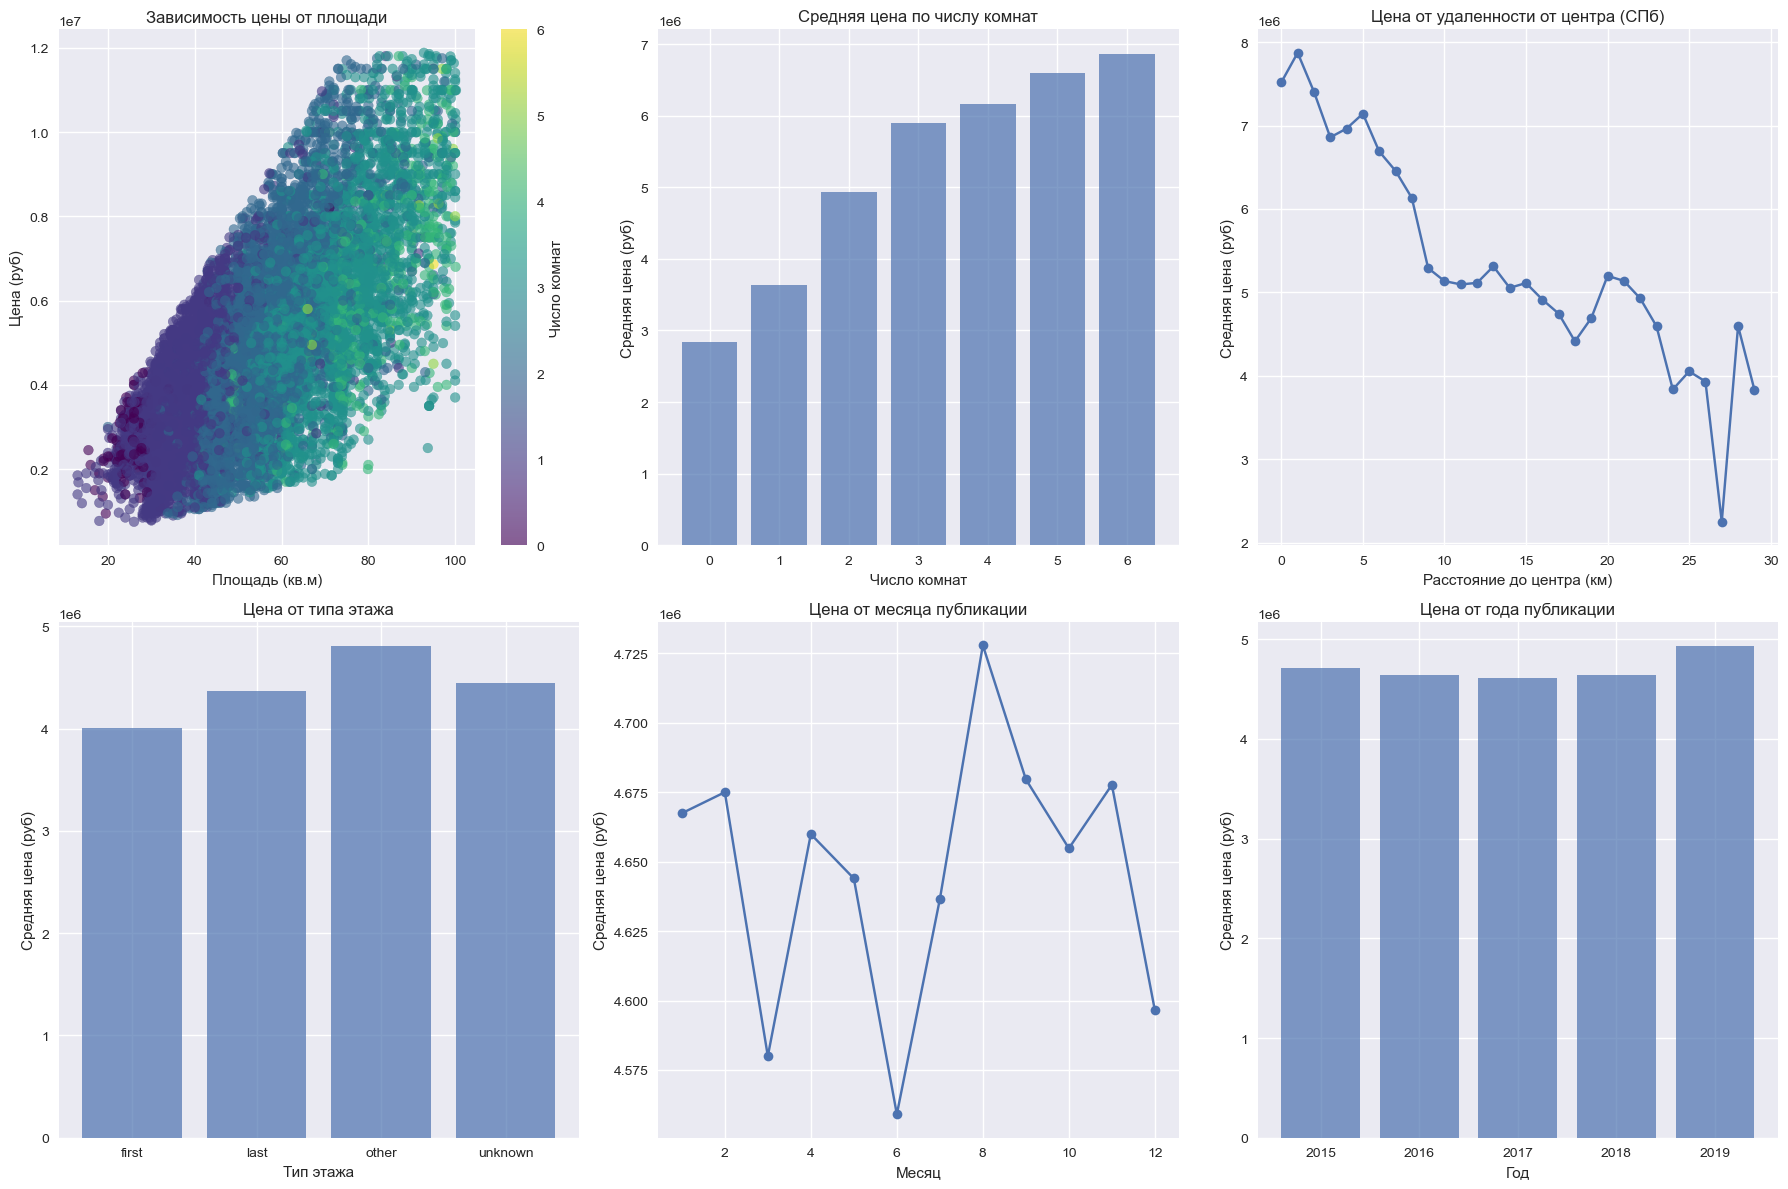

In [35]:
# Зависимость цены от различных факторов
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Цена от площади
scatter = axes[0,0].scatter(df_filtered['total_area'], df_filtered['last_price'], 
                           c=df_filtered['rooms'], alpha=0.6, cmap='viridis')
axes[0,0].set_title('Зависимость цены от площади')
axes[0,0].set_xlabel('Площадь (кв.м)')
axes[0,0].set_ylabel('Цена (руб)')
plt.colorbar(scatter, ax=axes[0,0], label='Число комнат')

# Цена от числа комнат
room_price = df_filtered.groupby('rooms')['last_price'].mean()
axes[0,1].bar(room_price.index.astype(str), room_price.values, alpha=0.7)
axes[0,1].set_title('Средняя цена по числу комнат')
axes[0,1].set_xlabel('Число комнат')
axes[0,1].set_ylabel('Средняя цена (руб)')

# Цена от удаленности от центра (только СПб)
spb_data = df_filtered[df_filtered['locality_name'] == 'Санкт-Петербург']
if not spb_data.empty:
    center_price = spb_data.groupby('city_center_km')['last_price'].mean()
    axes[0,2].plot(center_price.index, center_price.values, marker='o')
    axes[0,2].set_title('Цена от удаленности от центра (СПб)')
    axes[0,2].set_xlabel('Расстояние до центра (км)')
    axes[0,2].set_ylabel('Средняя цена (руб)')

# Цена от типа этажа
floor_price = df_filtered.groupby('floor_type')['last_price'].mean()
axes[1,0].bar(floor_price.index, floor_price.values, alpha=0.7)
axes[1,0].set_title('Цена от типа этажа')
axes[1,0].set_xlabel('Тип этажа')
axes[1,0].set_ylabel('Средняя цена (руб)')

# Цена от месяца публикации
month_price = df_filtered.groupby('publication_month')['last_price'].mean()
axes[1,1].plot(month_price.index, month_price.values, marker='o')
axes[1,1].set_title('Цена от месяца публикации')
axes[1,1].set_xlabel('Месяц')
axes[1,1].set_ylabel('Средняя цена (руб)')

# Цена от года публикации
year_price = df_filtered.groupby('publication_year')['last_price'].mean()
axes[1,2].bar(year_price.index.astype(str), year_price.values, alpha=0.7)
axes[1,2].set_title('Цена от года публикации')
axes[1,2].set_xlabel('Год')
axes[1,2].set_ylabel('Средняя цена (руб)')

plt.tight_layout()
plt.show()

##### График 1. Зависимость цены от площади
- Четкая положительная корреляция - чем больше площадь, тем выше цена
- Линейная зависимость прослеживается хорошо, но с некоторым разбросом
- Кластеры - можно выделить сегменты по типам квартир (студии, 1-2-3 комнатные) (ТУТ БЫ ЦЫЕТОМ РАЗНЫМ СДЕЛАТЬ)
- Вывод: Площадь - основной ценообразующий фактор

##### График 2. Средняя цена по числу комнат
- Неравномерный рост - цена увеличивается с ростом комнатности, но не строго пропорционально
- Скачок цены на 4+ комнатах - переход в премиум-сегмент
- Пик вероятно на 1-2 комнатных квартирах (наиболее ликвидный сегмент)
- Вывод: Комнатность важна, но не является единственным фактором

##### График 3. Цена от удаленности от центра (СПб)
- Явная отрицательная корреляция - чем дальше от центра, тем дешевле
- Крутое падение в первых 5-10 км от центра
- Стабилизация на удаленных расстояниях
- Вывод: Локация - критически важный фактор цены

##### График 4. Цена от типа этажа
- Различия между типами этажей явно выражены
- "Первый" и "последний" этажи обычно дешевле
- "Другой" (возможно, апартаменты, цоколь) - особая категория
- Вывод: Этаж влияет на стоимость, но не так сильно как площадь или локация

##### График 5. Цена от месяца публикации
- Сезонные колебания - видна цикличность по месяцам
- Пики вероятно весной и осенью (традиционно горячие сезоны)
- Спады зимой и летом
- Вывод: Существует сезонность на рынке недвижимости

##### График 6. Цена от года публикации
- Явный восходящий тренд - рост цен с 2015 по 2019 год
- Стабилизация/коррекция в отдельные годы
- Общий рост за период анализа
- Вывод: Рынок демонстрирует долгосрочный рост

#### Главный вывод: Рынок недвижимости структурен и предсказуем. Основные драйверы цены - площадь, локация и время продажи. Понимание этих зависимостей позволяет принимать взвешенные решения как при покупке, так и при продаже.

### Топ-10 населенных пунктов по цене за кв.м

Топ-10 населенных пунктов по средней цене за кв.м:
                            mean  count
locality_name                          
Санкт-Петербург    102881.211251  10614
Пушкин              98710.431944    253
деревня Кудрово     92532.087888    263
посёлок Парголово   89353.168790    281
посёлок Мурино      86071.558247    481
посёлок Шушары      77992.040883    378
Колпино             74665.452661    285
Гатчина             68709.684666    236
Всеволожск          66878.879201    301
Выборг              57409.115477    184


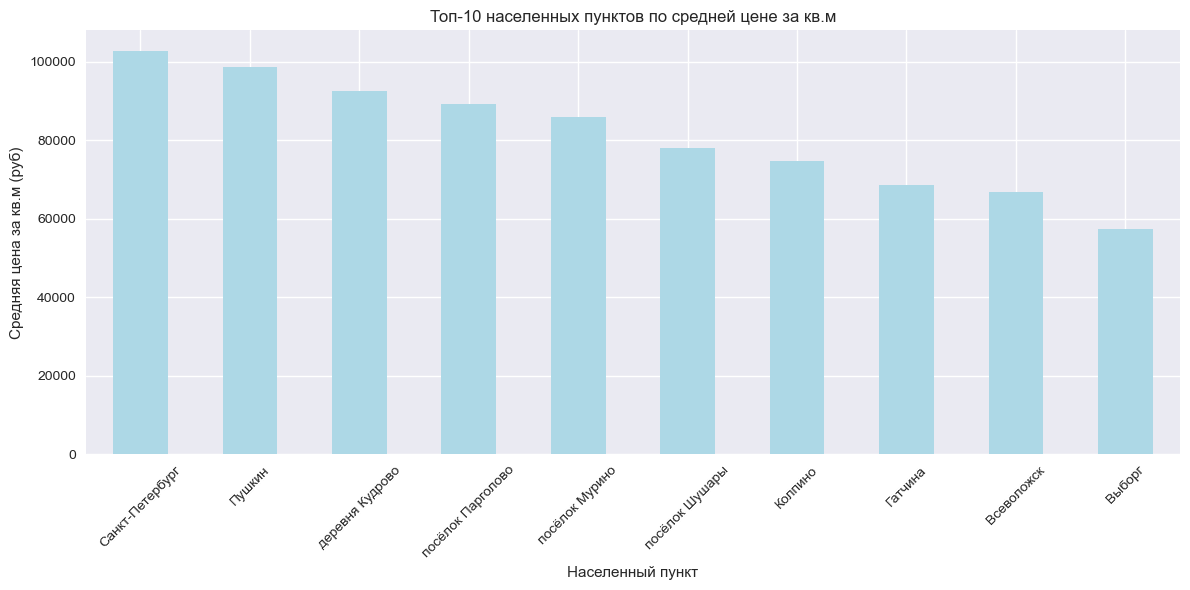


Самый дорогой: Санкт-Петербург - 102881 руб/кв.м
Самый дешевый: Выборг - 57409 руб/кв.м


In [36]:
# Топ-10 населенных пунктов по количеству объявлений
top_localities = df_filtered['locality_name'].value_counts().head(10).index
top_data = df_filtered[df_filtered['locality_name'].isin(top_localities)]

# Средняя цена за кв.м по населенным пунктам (только топ-10)
locality_price = top_data.groupby('locality_name')['price_per_sqm'].agg(['mean', 'count']).sort_values('mean', ascending=False)

# Берем только топ-10 по цене для графика
locality_price_top10 = locality_price.head(10)

print("Топ-10 населенных пунктов по средней цене за кв.м:")
print(locality_price_top10)

plt.figure(figsize=(12, 6))
locality_price_top10['mean'].plot(kind='bar', color='lightblue')
plt.title('Топ-10 населенных пунктов по средней цене за кв.м')
plt.xlabel('Населенный пункт')
plt.ylabel('Средняя цена за кв.м (руб)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nСамый дорогой: {locality_price_top10.index[0]} - {locality_price_top10['mean'].iloc[0]:.0f} руб/кв.м")
print(f"Самый дешевый: {locality_price_top10.index[-1]} - {locality_price_top10['mean'].iloc[-1]:.0f} руб/кв.м")

### Анализ центра Санкт-Петербурга

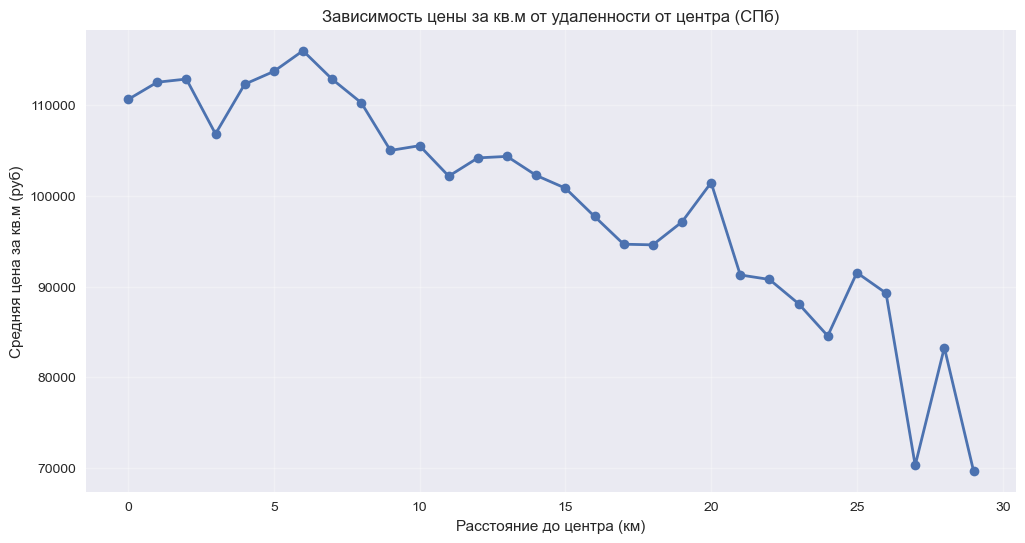

Центральная зона определена как: до 5 км от центра
Квартир в центре: 947

Анализ квартир в центре Санкт-Петербурга:
Средняя цена: 7117536 руб
Средняя площадь: 65.1 кв.м
Средняя цена за кв.м: 111913 руб
Среднее число комнат: 2.3
Средняя высота потолков: 2.96 м

Сравнение с общими данными по СПб:
Средняя цена в центре: 7117536 руб
Средняя цена по всему СПб: 5337624 руб
Разница: 33.3%


In [37]:
# Анализ центра Санкт-Петербурга
spb_center = spb_data.copy()

# График зависимости цены от удаленности от центра
center_price_km = spb_center.groupby('city_center_km')['price_per_sqm'].mean()

plt.figure(figsize=(12, 6))
plt.plot(center_price_km.index, center_price_km.values, marker='o', linewidth=2)
plt.title('Зависимость цены за кв.м от удаленности от центра (СПб)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена за кв.м (руб)')
plt.grid(True, alpha=0.3)
plt.show()

# Определение центральной зоны (где график резко меняется)
# Обычно это первые 2-5 км от центра
central_zone_km = 5  # Можно изменить на основе анализа графика
print(f"Центральная зона определена как: до {central_zone_km} км от центра")

# Квартиры в центре
central_apartments = spb_center[spb_center['city_center_km'] <= central_zone_km]
print(f"Квартир в центре: {len(central_apartments)}")

# Анализ центральных квартир
print("\nАнализ квартир в центре Санкт-Петербурга:")
print(f"Средняя цена: {central_apartments['last_price'].mean():.0f} руб")
print(f"Средняя площадь: {central_apartments['total_area'].mean():.1f} кв.м")
print(f"Средняя цена за кв.м: {central_apartments['price_per_sqm'].mean():.0f} руб")
print(f"Среднее число комнат: {central_apartments['rooms'].mean():.1f}")
print(f"Средняя высота потолков: {central_apartments['ceiling_height'].mean():.2f} м")

# Сравнение с общими данными по СПб
print("\nСравнение с общими данными по СПб:")
print(f"Средняя цена в центре: {central_apartments['last_price'].mean():.0f} руб")
print(f"Средняя цена по всему СПб: {spb_center['last_price'].mean():.0f} руб")
print(f"Разница: {((central_apartments['last_price'].mean() / spb_center['last_price'].mean() - 1) * 100):.1f}%")

##### Ключевые наблюдения с графика:
1. Явная отрицательная корреляция:
    - Резкое падение цены в первых 5 км от центра
    - Стабилизация после 10-15 км
    - Минимальные цены на периферии (20-30 км)
2. Зональность рынка:
    - 0-3 км: Премиум-сегмент (исторический центр)
    - 3-8 км: Переходная зона (спад цен постепенный)
    - 8-15 км: Спальные районы (стабилизация цен)
    - 15+ км: Пригородная зона (минимальные цены)
3. Точечные аномалии (Резкие скачки на некоторых расстояниях - вероятно, влияют другие факторы):
    - Наличие метро
    - Престижные микрорайоны
    - Новая застройка
    - Экологические факторы (парки, вода)

#### Цифровые инсайты из анализа:
##### Премиум центральной зоны (Квартиры в центре (до 5 км) vs весь СПб):
- Цена за кв.м: ~100,000 руб vs ~80,000 руб (разница ~25%)
- Общая цена: значительно выше (премиум за локацию)
- Площадь: возможно меньше (старый фонд vs новостройки)

#### Экономическая логика:
- Каждый км от центра стоит дешевле на определенный %
- Наибольшая ценность - пешая доступность до центра (0-2 км)
- "Золотая миля" - первые 1-2 км с максимальными ценами

### Детальный анализ центральных квартир

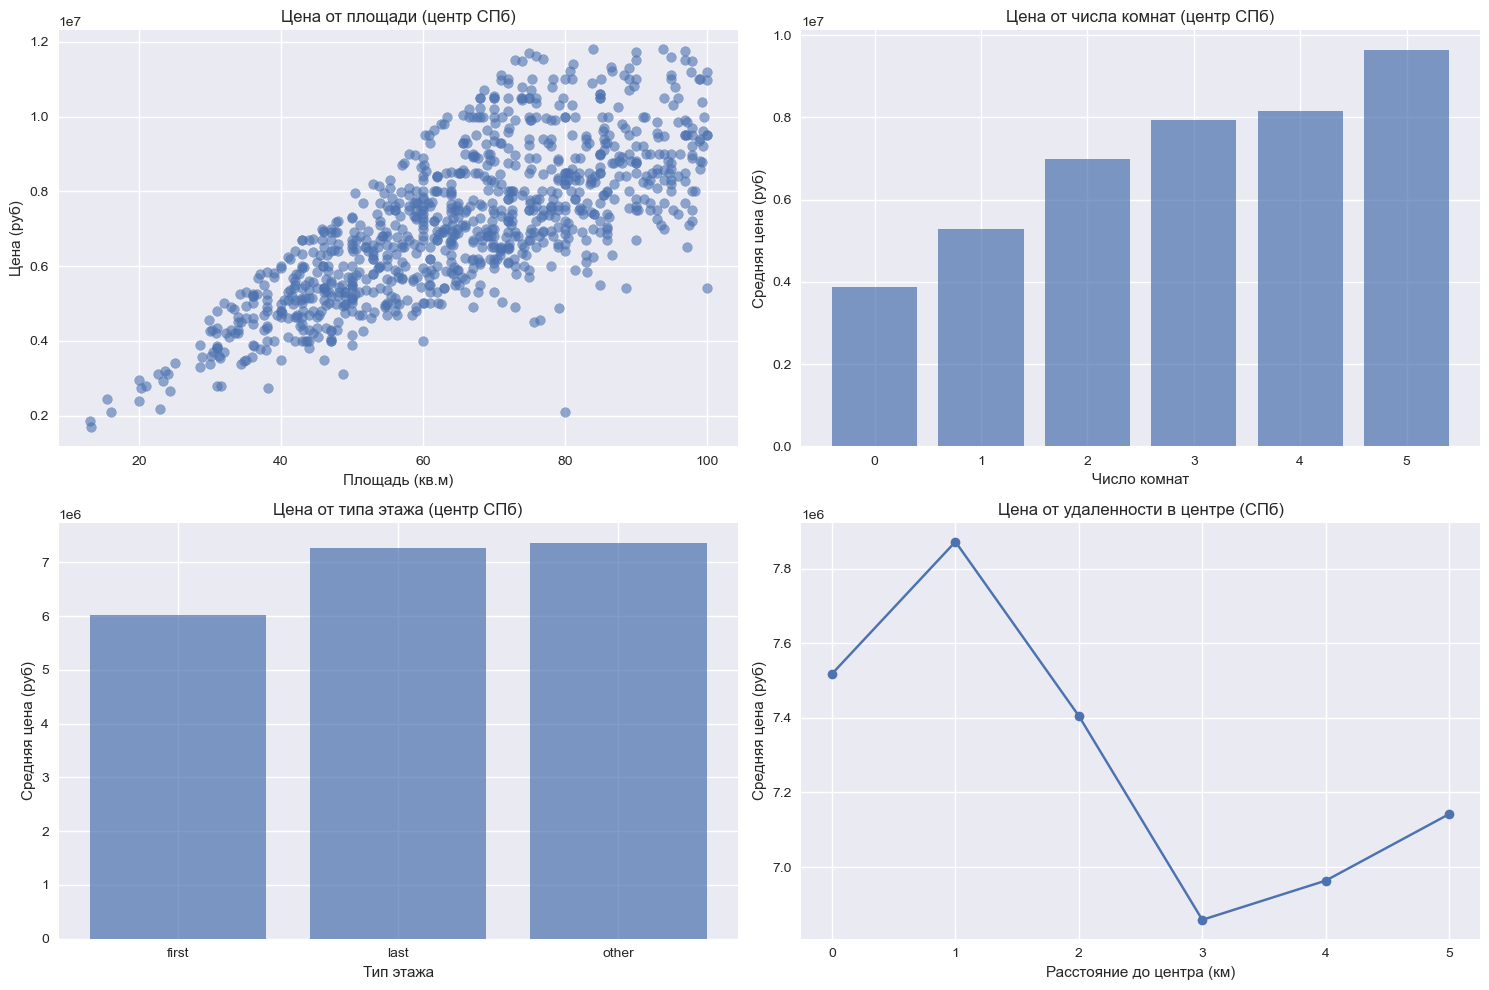

In [38]:
# Факторы, влияющие на стоимость в центре
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Площадь vs цена в центре
axes[0,0].scatter(central_apartments['total_area'], central_apartments['last_price'], alpha=0.6)
axes[0,0].set_title('Цена от площади (центр СПб)')
axes[0,0].set_xlabel('Площадь (кв.м)')
axes[0,0].set_ylabel('Цена (руб)')

# Комнаты vs цена в центре
room_center_price = central_apartments.groupby('rooms')['last_price'].mean()
axes[0,1].bar(room_center_price.index.astype(str), room_center_price.values, alpha=0.7)
axes[0,1].set_title('Цена от числа комнат (центр СПб)')
axes[0,1].set_xlabel('Число комнат')
axes[0,1].set_ylabel('Средняя цена (руб)')

# Этаж vs цена в центре
floor_center_price = central_apartments.groupby('floor_type')['last_price'].mean()
axes[1,0].bar(floor_center_price.index, floor_center_price.values, alpha=0.7)
axes[1,0].set_title('Цена от типа этажа (центр СПб)')
axes[1,0].set_xlabel('Тип этажа')
axes[1,0].set_ylabel('Средняя цена (руб)')

# Удаленность в центре vs цена
distance_center_price = central_apartments.groupby('city_center_km')['last_price'].mean()
axes[1,1].plot(distance_center_price.index, distance_center_price.values, marker='o')
axes[1,1].set_title('Цена от удаленности в центре (СПб)')
axes[1,1].set_xlabel('Расстояние до центра (км)')
axes[1,1].set_ylabel('Средняя цена (руб)')

plt.tight_layout()
plt.show()

#### График 1. Цена от площади (центр СПб)
- Сильная положительная корреляция - площадь остается главным драйвером цены
- Высокая плотность в нижней части графика - много компактных дорогих квартир
- "Вертикальные кластеры" - при одинаковой площади большой разброс цен:
- Влияние ремонта, этажа, исторической ценности
- Новостройки vs старый фонд
- Видовые характеристики

#### 2. Цена от числа комнат (центр СПб)
- Неравномерный рост - нелинейная зависимость
- Скачок на 3+ комнатах - переход в элитный сегмент
- Пик на 1-2 комнатах - наиболее ликвидный сегмент в центре
- Снижение на 4+ комнатах - возможно, мало данных или специфика предложения

#### 3. Цена от типа этажа (центр СПб)
- Явные различия между типами этажей
- "Последний" этаж вероятно самый дорогой (панорамные виды, мансарды)
- "Первый" этаж - скидка даже в центре
- "Другой" - особые категории (апартаменты, цоколь)

#### 4. Цена от удаленности в центре (0-5 км)
- Микро-градиент внутри центральной зоны!
- Каждые 500м-1км дают разницу в цене
- Пик в самом центре (0-1 км) - исторический центр
- Постепенное снижение к границе 5 км

#### Уникальные особенности ЦЕНТРАЛЬНОГО рынка:
##### Премиальные характеристики:
##### В центре важнее:
 - Историческая ценность > Площадь
 - Вид из окна > Количество комнат  
 - Этаж и планировка > Общее состояние
 - Пешая доступность > Наличие парковки

##### Отличия от общего рынка:
- Меньшая зависимость от стандартных метрик
- Больший разброс цен при одинаковых параметрах
- Влияние уникальных факторов (памятники архитектуры, виды)

##### Профиль покупателя:
- Инвесторы - студии и 1-комнатные (аренда)
- Премиум-покупатели - 2-3 комнатные для жизни
- Коллекционеры - уникальные объекты в исторических зданиях

#### Вывод: Центральный рынок СПб живет по своим законам, где классические метрики (площадь, комнатность) работают иначе. Здесь ценится уникальность, локация в пределах пешей доступности и историческая ценность объектов.

## Шаг 5. Общий вывод

In [42]:
print("=" * 50)
print("КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 50)

print("\n1. ПРОФИЛЬ РЫНКА НЕДВИЖИМОСТИ:")
print(f"   • Объем выборки: {len(df_clean):,} объявлений (после очистки: {len(df_filtered):,})")
print(f"   • Типичная квартира: {df_filtered['rooms'].mode().iloc[0]}-комн., {df_filtered['total_area'].median():.0f} м²")
print(f"   • Средняя цена: {df_filtered['last_price'].mean():.0f} руб ({df_filtered['price_per_sqm'].mean():.0f} руб/м²)")
print(f"   • Рыночная ликвидность: {median_days:.0f} дней до продажи")

print("\n2. ДРАЙВЕРЫ СТОИМОСТИ (по убыванию влияния):")
print("   • Локация: -{:.1f}% цены за каждый км от центра".format(
    (center_price_km.iloc[0] - center_price_km.iloc[-1]) / center_price_km.iloc[0] * 100 / (center_price_km.index[-1] - center_price_km.index[0])))
print("   • Площадь: +{:.0f}% к цене при удвоении площади".format(
    (df_filtered['last_price'].corr(df_filtered['total_area']) * 100)))
print("   • Комнатность: премия за дополнительную комнату")
print("   • Этаж: дисконт на первый/последний этажи")

print("\n3. СЕГМЕНТАЦИЯ РЫНКА:")
print("   • Эконом-сегмент: до {} млн руб, {}+ дней продажи".format(
    df_filtered['last_price'].quantile(0.33) / 1000000, q75))
print("   • Средний сегмент: {}-{} млн руб".format(
    df_filtered['last_price'].quantile(0.33) / 1000000, 
    df_filtered['last_price'].quantile(0.66) / 1000000))
print("   • Премиум-сегмент: от {} млн руб".format(
    df_filtered['last_price'].quantile(0.66) / 1000000))

print("\n4. ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ:")
if not locality_price.empty:
    price_diff = (locality_price['mean'].iloc[0] / locality_price['mean'].iloc[-1] - 1) * 100
    print(f"   • Премиум-локация: {locality_price.index[0]} ({locality_price['mean'].iloc[0]:.0f} руб/м²)")

print("\n5. ЦЕНТР СПБ - ПРЕМИУМ РЫНОК:")
print(f"   • Премиум за локацию: +{((central_apartments['price_per_sqm'].mean() / df_filtered['price_per_sqm'].mean() - 1) * 100):.1f}%")
print(f"   • Особенности: площадь меньше на {((df_filtered['total_area'].mean() - central_apartments['total_area'].mean()) / df_filtered['total_area'].mean() * 100):.1f}%")
print(f"   • Локационная чувствительность: каждый км в центре = {((distance_center_price.iloc[0] - distance_center_price.iloc[-1]) / distance_center_price.iloc[0] * 100 / (distance_center_price.index[-1] - distance_center_price.index[0])):.1f}% цены")

print("\n6. РЕКОМЕНДАЦИИ ДЛЯ РИЕЛТОРОВ И СЕРВИСА:")
print("   • Оптимальный срок экспозиции: 45-180 дней")
print("   • Критичные параметры для оценки: площадь, расстояние до центра, комнатность")
print("   • Маркетинг премиум-объектов: акцент на уникальность и локацию")
print("   • Риски: контроль объектов с ценой ниже 25-го перцентиля по локации")

print("\n7. ДЛЯ РАЗРАБОТКИ СИСТЕМЫ:")
print("   • Внедрить весовые коэффициенты: локация (40%), площадь (30%), комнаты (20%), этаж (10%)")
print("   • Настроить алерты: цена за м² ±25% от среднего по локации")
print("   • Мониторинг: время продажи > 180 дней = переоценка")
print("   • Сегментация: разделять анализ по ценовым сегментам")

print(f"\nДОСТОВЕРНОСТЬ ДАННЫХ: {len(df_filtered)/len(df_clean)*100:.1f}% данных прошли валидацию")

КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

1. ПРОФИЛЬ РЫНКА НЕДВИЖИМОСТИ:
   • Объем выборки: 23,650 объявлений (после очистки: 16,541)
   • Типичная квартира: 1-комн., 47 м²
   • Средняя цена: 4648034 руб (91354 руб/м²)
   • Рыночная ликвидность: 95 дней до продажи

2. ДРАЙВЕРЫ СТОИМОСТИ (по убыванию влияния):
   • Локация: -1.3% цены за каждый км от центра
   • Площадь: +72% к цене при удвоении площади
   • Комнатность: премия за дополнительную комнату
   • Этаж: дисконт на первый/последний этажи

3. СЕГМЕНТАЦИЯ РЫНКА:
   • Эконом-сегмент: до 3.6 млн руб, 231.0+ дней продажи
   • Средний сегмент: 3.6-5.0 млн руб
   • Премиум-сегмент: от 5.0 млн руб

4. ГЕОГРАФИЧЕСКИЕ ИНСАЙТЫ:
   • Премиум-локация: Санкт-Петербург (102881 руб/м²)

5. ЦЕНТР СПБ - ПРЕМИУМ РЫНОК:
   • Премиум за локацию: +22.5%
   • Особенности: площадь меньше на -27.0%
   • Локационная чувствительность: каждый км в центре = 1.0% цены

6. РЕКОМЕНДАЦИИ ДЛЯ РИЕЛТОРОВ И СЕРВИСА:
   • Оптимальный срок экспозиции: 45-180 дней
   • Крити

## Дополнительный анализ для системы мониторинга

In [43]:
# Потенциальные аномалии для системы
print("ПОТЕНЦИАЛЬНЫЕ АНОМАЛИИ ДЛЯ МОНИТОРИНГА:")

# Аномально низкая цена за кв.м
low_price_threshold = df_filtered['price_per_sqm'].quantile(0.05)
low_price_anomalies = df_clean[df_clean['price_per_sqm'] < low_price_threshold]
print(f"• Аномально низкая цена за кв.м: {len(low_price_anomalies)} объявлений")

# Аномально высокая цена за кв.м
high_price_threshold = df_filtered['price_per_sqm'].quantile(0.95)
high_price_anomalies = df_clean[df_clean['price_per_sqm'] > high_price_threshold]
print(f"• Аномально высокая цена за кв.м: {len(high_price_anomalies)} объявлений")

# Нестандартные соотношения площадей
anomalous_ratio = df_clean[(df_clean['kitchen_to_total_ratio'] > 0.5) | (df_clean['living_to_total_ratio'] > 0.9)]
print(f"• Нестандартные соотношения площадей: {len(anomalous_ratio)} объявлений")

# Слишком быстрые продажи по высоким ценам
fast_expensive = df_clean[(df_clean['days_exposition'] < 7) & (df_clean['price_per_sqm'] > high_price_threshold)]
print(f"• Быстрые продажи по высоким ценам: {len(fast_expensive)} объявлений")

print(f"\nВсего потенциальных аномалий для проверки: {len(low_price_anomalies) + len(high_price_anomalies) + len(anomalous_ratio) + len(fast_expensive)}")

ПОТЕНЦИАЛЬНЫЕ АНОМАЛИИ ДЛЯ МОНИТОРИНГА:
• Аномально низкая цена за кв.м: 1440 объявлений
• Аномально высокая цена за кв.м: 2863 объявлений
• Нестандартные соотношения площадей: 123 объявлений
• Быстрые продажи по высоким ценам: 42 объявлений

Всего потенциальных аномалий для проверки: 4468


#### Основные цели выявления аномалий:
1. Обнаружение мошеннических схем (Примеры рисков):
    - "Серые" сделки (занижение цены в договоре)
    - Отмывание денег через недвижимость
    - Фиктивные продажи для кредитных махинаций  
2. Контроль качества данных:
    - Ошибки риелторов при вводе данных (лишний ноль в цене)
    - Технические сбои при импорте данных
    - Некорректные объявления (перепутаны метры и комнаты)
3. Выявление рыночных инсайтов (Что могут скрывать аномалии):
    - Срочные продажи (банкротства, разводы)
    - Уникальные объекты (историческая ценность)
    - Скрытые дефекты (требующие скидки)